<a href="https://colab.research.google.com/github/mirandabad/AEM_final_project/blob/master/AEM_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Census 2020: Hard to Count Communities**

##**Research Question:** 
What impact did demographic factors (e.g., race, ethnicity, poverty) have on 2010 Census response rates in Hard To Count Communities?

*Hypothesis*: 

##**Data Sources**

The data source used is from the  [Census 2020 HTC Map Application](https://www.censushardtocountmaps2020.us/). This application was created by the [Center for Urban Research at the City University of New York Graduate Center's Mapping Service](https://www.gc.cuny.edu/urbanresearchmaps).

The [Texas Excel File](https://www.censushardtocountmaps2020.us/exports/pdb2015tract_2010MRR_2017ACS_TX.xlsx)

The Excel file includes the [2010 Census mail return rate] (), the [ACS 2013-2017 population estimates]() demographic estimates for populations at risk of being undercounted, and [internet access estimates for each Census tract in Texas]().

Each file has two worksheets:
one with the data,
the other with a description of the columns/fields. This second worksheet (called Fieldnames) also includes source information for the data.

The tract data is compiled from two Census Bureau sources: the Bureau's Planning Database (which provides the 2010 mail return rates); and the 2013-2017 American Community Survey estimates (via American FactFinder).

> -  note that state totals do not reflect the sum of all counties in Texas and are aggregated from congressional district data.

> - *Note: The above data set has been downloaded and saved with its original file name "pdb2015tract_2010MRR_2017ACS_TX.xlsx".*

##**Importing Data**
Import state specific info for child food insecurity numbers and percentages (i.e., "Location" = "Texas") for the years (i.e., "Time Frame") 2010-2016. Remove data for counties, percentages, and 2016

In [0]:
import pandas as pd


# Load Excel sheet into pandas dataframe, ignoring top header/notes rows
hard_to_count = pd.read_excel("pdb2015tract_2010MRR_2017ACS_TX.xlsx", skiprows=[0,1,2,3,4])

# Filter out Census tracts that do not fall within the 'hard to count' parameters
hard_to_count_data = hard_to_count.loc[hard_to_count[(hard_to_count['MRR2010']<=73)].index, :]

# Create individual lists of data for each hard to count community
response_rate = list(hard_to_count_data['MRR2010'])
total_pop = list(hard_to_count_data['TotPopACS17'])
white_alone = list(hard_to_count_data['WhiteAloneOrCombo'])
black_alone = list(hard_to_count_data['BlackAloneOrCombo'])
amer_ind_alone = list(hard_to_count_data['AmerIndAloneorCombo'])
asian_alone = list(hard_to_count_data['AsianAloneOrCombo'])
hispanic = list(hard_to_count_data['Hispanic'])
nat_haw_alone = list(hard_to_count_data['NatHawAloneOrCombo'])

##**Compare Variables**
Question: As the number of Texas children (aged 0-17) receiving aid from the Supplemental Nutrition Assistance Program (SNAP) changes, is there any relation with the level of food insecurity for children in Texas?

Answer: There appears to have been a small correlation between child food insecurity in Texas and child SNAP recipients in the years 2010-2015. When the number of children receiving SNAP was higher during this time period, the number of children experiencing food insecurity was lower. Further longitudinal analysis would be necessary to determine if there is a stronger correlation.

##**Correlation**


##**Regression**


In [0]:
# Import Seaborn plotting library because it looks nicer than generic Matplotlib
import seaborn as sns
# Set color for Seaborn plots
sns.set(style="darkgrid")

# Write Python function to create scatter plot lists of data
# Function takes in two different lists, x & y
# It uses the Seaborn 'joinplot' function to create a linear regression with marginal distribution
def create_plot(x, y):
  return sns.jointplot(x=x, y=y, kind="reg", color="m", height=7)

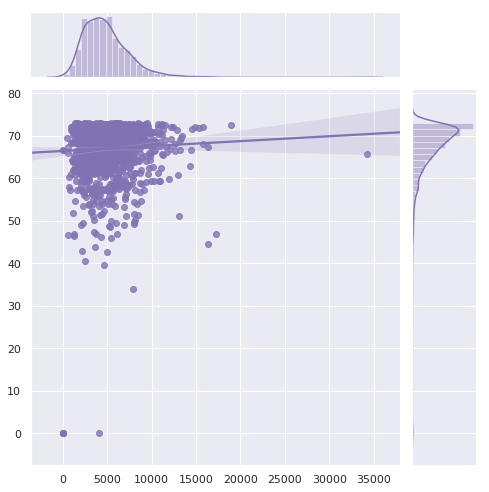

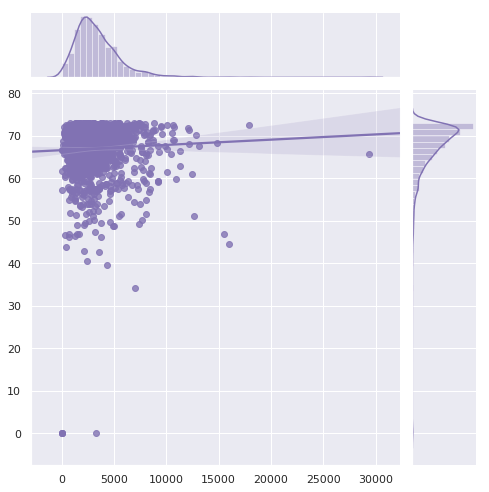

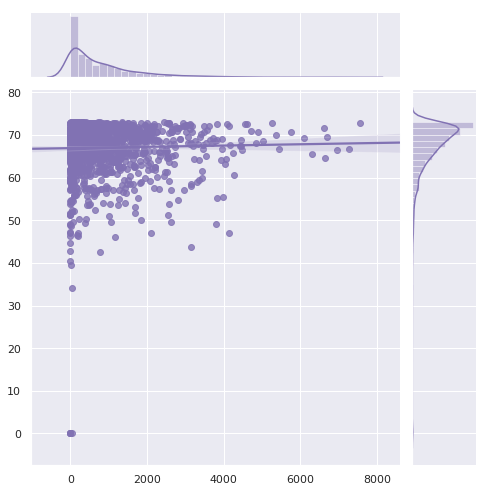

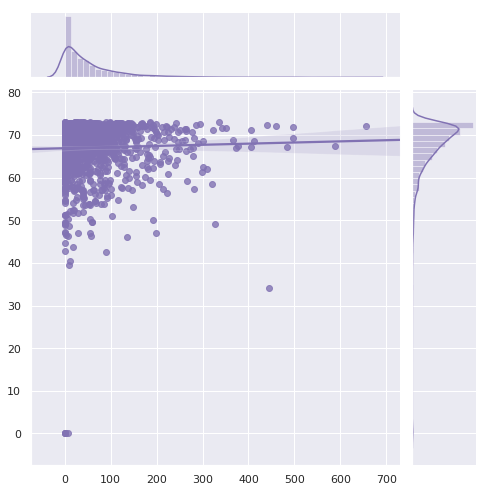

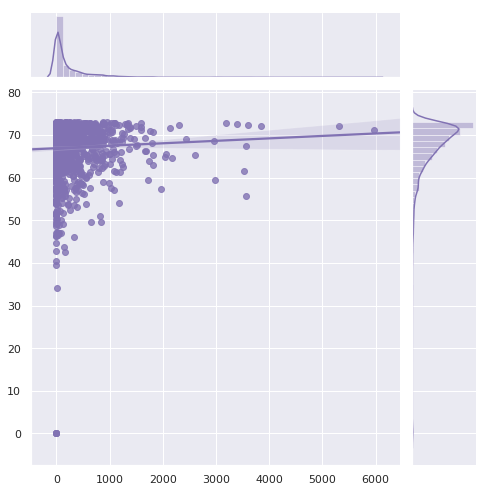

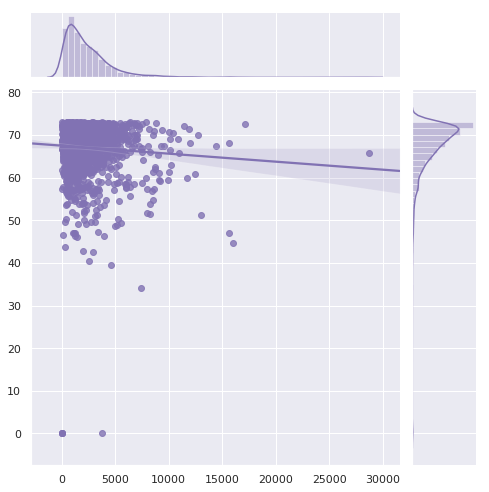

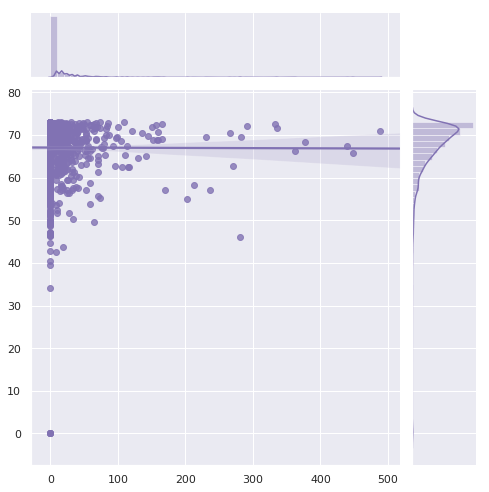

In [0]:
total_pop_plot = create_plot(total_pop, response_rate)
white_alone_plot = create_plot(white_alone, response_rate)
black_alone_plot = create_plot(black_alone, response_rate)
amer_ind_alone_plot = create_plot(amer_ind_alone, response_rate)
asian_alone_plot = create_plot(asian_alone, response_rate)
hispanic_plot = create_plot(hispanic, response_rate)
nat_haw_alone_plot = create_plot(nat_haw_alone, response_rate)

##**Analysis**

##**Conclusion**
Question: As the number of Texas children (aged 0-17) receiving aid from the Supplemental Nutrition Assistance Program (SNAP) changes, is there any relation with the level of food insecurity for children in Texas?

Answer: There appears to have been a small correlation between child food insecurity in Texas and child SNAP recipients in the years 2010-2015. When the number of children receiving SNAP was higher during this time period, the number of children experiencing food insecurity was lower. Further longitudinal analysis would be necessary to determine if there is a stronger correlation.